# Importing Libraries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [207]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


As we are getting information from above imported data it is a supervised machine learning problem because traget column is there. Know we have analyse from different different types.

# Exploratory Data Aanalysis

In [208]:
#Checking of Shape of Data.
df.shape

(32560, 15)

In [209]:
#Checking types of data.
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [210]:
#Checking Data Types or Missing Value of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [211]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we are seeing there are no Missing Value in data.

In [212]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
Age,"[50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 3...",73
Workclass,"[ Self-emp-not-inc, Private, State-gov, Fed...",9
Fnlwgt,"[83311, 215646, 234721, 338409, 284582, 160187...",21647
Education,"[ Bachelors, HS-grad, 11th, Masters, 9th, ...",16
Education_num,"[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...",16
Marital_status,"[ Married-civ-spouse, Divorced, Married-spou...",7
Occupation,"[ Exec-managerial, Handlers-cleaners, Prof-s...",15
Relationship,"[ Husband, Not-in-family, Wife, Own-child, ...",6
Race,"[ White, Black, Asian-Pac-Islander, Amer-In...",5
Sex,"[ Male, Female]",2


Here we are identify unique value of all features and try to find unique values. As we are getting in Workclass, Occupation and Native_country have "?" firsrt we have to convert into NaN value then treat as missing value.

In [213]:
df['Income'] = df['Income'].str.replace('<=50K', '0')
df['Income'] = df['Income'].str.replace('>50K', '1')
df['Income'] = df['Income'].astype(np.int64)

As we know in target variable we have two unique value first is <=50K and second is >50K so here for perdiction we are encoding into 0 as <=50K or 1 as >50K.

In [215]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [216]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [217]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [218]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [219]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [220]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [221]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [222]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [223]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [224]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Observations: I checked all feartures unique values and in workclass, Occupation and Native_country have ""?"" as a value so we have to repalce ? with NaN value and treate as missing value.   

In [225]:
df['Workclass'] = df['Workclass'].str.replace('Never-worked', 'Without-pay')

We considered Nerver worked and Without_pay as a one category. So we are replacing Never-worked with without-pay.

In [226]:
df['Workclass'] = df['Workclass'].replace([' ?'],np.nan)

In [227]:
df['Occupation'] = df['Occupation'].replace([' ?'],np.nan)

In [228]:
df['Native_country'] = df['Native_country'].replace([' ?'],np.nan)

In [229]:
df = df.fillna(df['Workclass'].value_counts().index[0])

In [230]:
df = df.fillna(df['Occupation'].value_counts().index[0])

In [231]:
df = df.fillna(df['Native_country'].value_counts().index[0])

here we are repacing ? with nan value and with the help of mode fucnctionality (most frequent) we are imputing the values. 

# Statistical Summary

In [232]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Here we are analysing the all numerical features statistically and as we are seeing here all numerical features describing with count,mean,std,minm,25%,50%, 75% and max.

# Data Visualization

# Correlation

<AxesSubplot:>

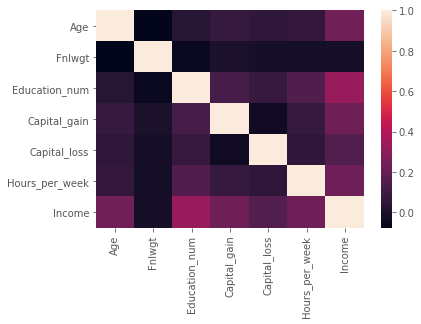

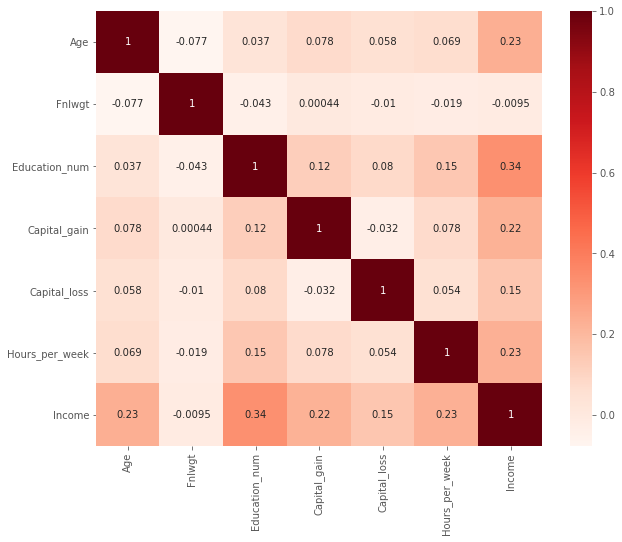

In [233]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Reds',annot=True)

Age,Education_num, Capital_gain and Hours_per_week are highly correlated with traget variable.

# Univariate Analysis

Text(0.5, 1.0, 'Age')

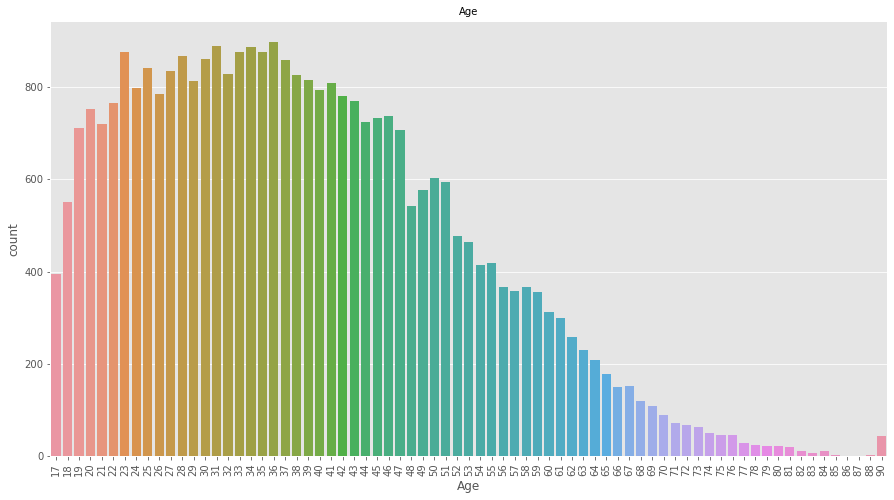

In [111]:
fig_size = (15,8)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Age")
plt.xticks(rotation=90)
plt.title("Age", fontsize = 10)

As we are getting  the highest count of age people between 22 to 40. 

Text(0.5, 1.0, 'Workclass')

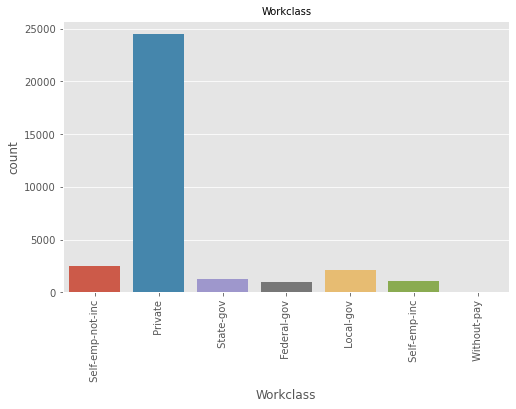

In [112]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Workclass")
plt.xticks(rotation=90)
plt.title("Workclass", fontsize = 10)

The majority of people from private Sector and others are very few those are belongs from other.

Text(0.5, 1.0, 'Education')

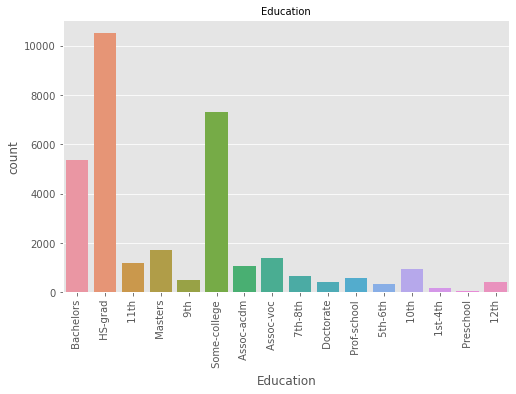

In [113]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Education")
plt.xticks(rotation=90)
plt.title("Education", fontsize = 10)

The HS-grad is the highest counts as we are getting and second or third highest are Some-college and Bachelors. 

Text(0.5, 1.0, 'Marital_status')

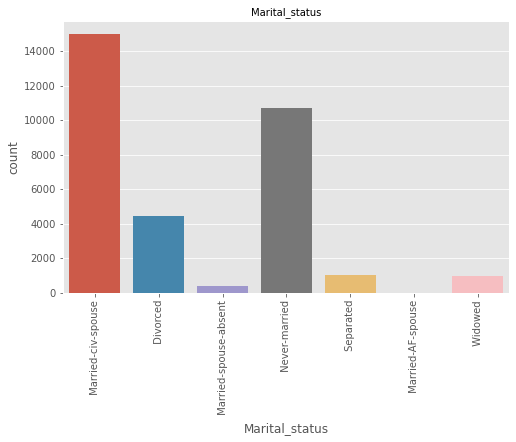

In [114]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Marital_status")
plt.xticks(rotation=90)
plt.title("Marital_status", fontsize = 10)

As we see the Married-civ-spouse is highest one, second highest is Never-married and third highest is Divorced.

Text(0.5, 1.0, 'Occupation')

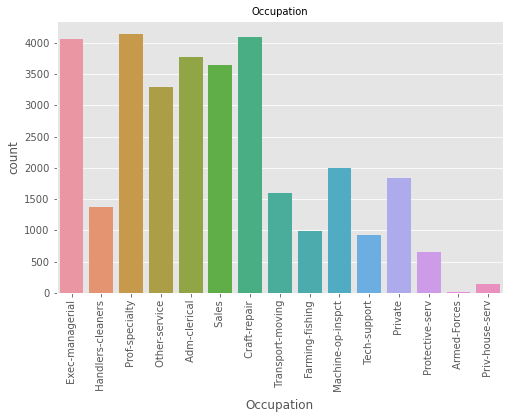

In [115]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Occupation")
plt.xticks(rotation=90)
plt.title("Occupation", fontsize = 10)

Exec-managerial, Prof-speciality, other-service,Admn-clerical, sales and Craft-repair are much higher than others.

Text(0.5, 1.0, 'Race')

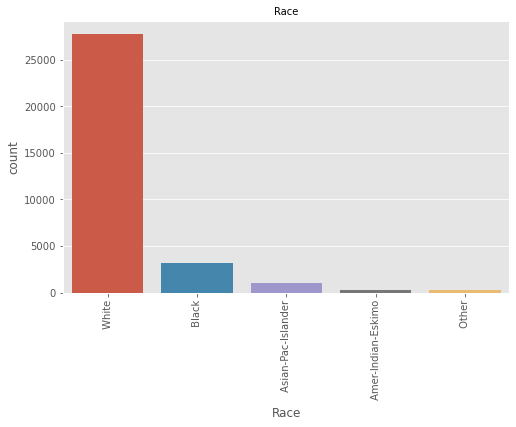

In [116]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Race")
plt.xticks(rotation=90)
plt.title("Race", fontsize = 10)

White is much higher than others.

Text(0.5, 1.0, 'Hours_per_week')

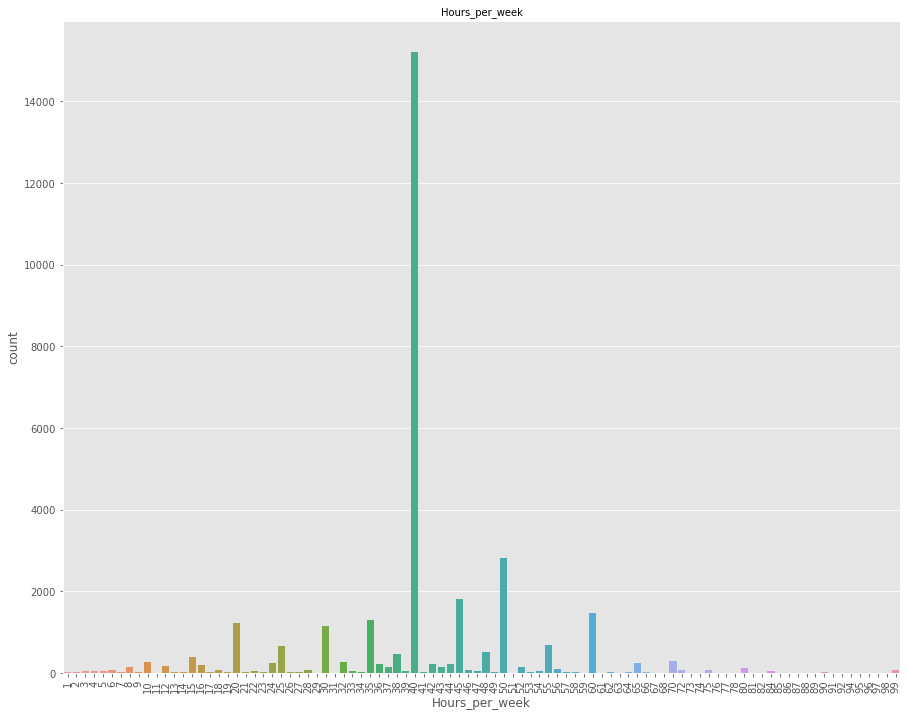

In [117]:
fig_size = (15,12)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Hours_per_week")
plt.xticks(rotation=90)
plt.title("Hours_per_week", fontsize = 10)

As we see the 40 number has highest count.

Text(0.5, 1.0, 'Native_country')

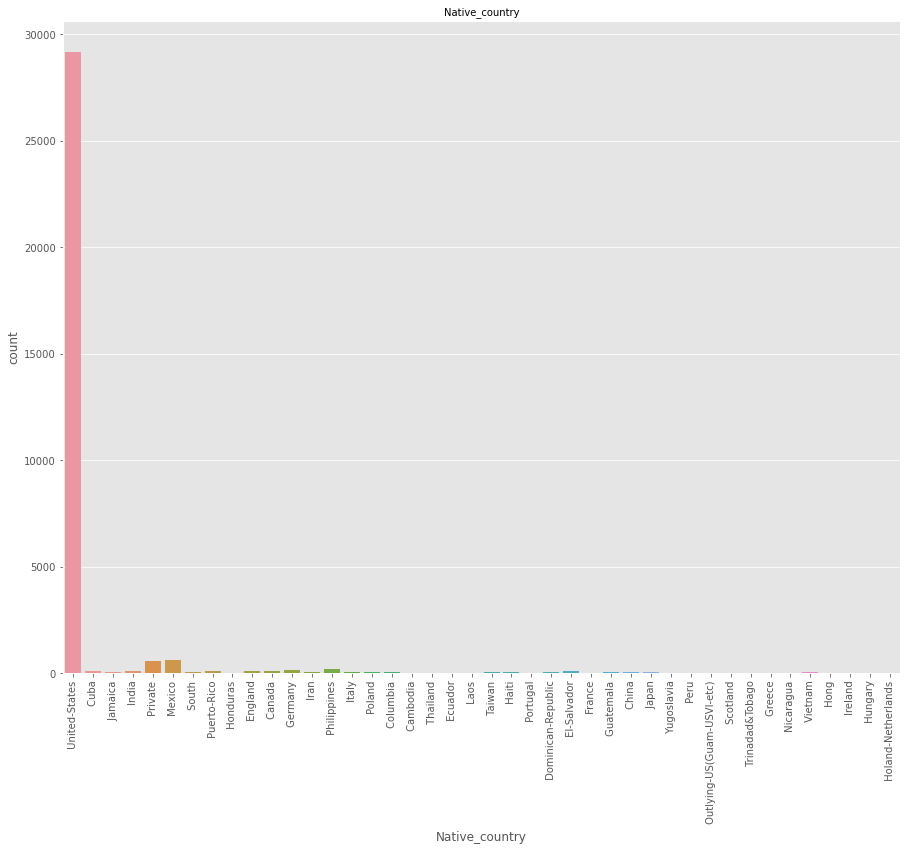

In [118]:
fig_size = (15,12)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Native_country")
plt.xticks(rotation=90)
plt.title("Native_country", fontsize = 10)

If we see United-States the majority of people are belongs from there.

# Bivariate Analysis

Text(0.5, 1.0, 'Income')

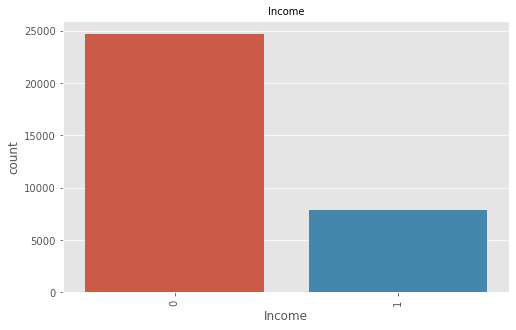

In [119]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Income")
plt.xticks(rotation=90)
plt.title("Income", fontsize = 10)

In traget variable there are majority of people have income <=50K as we are getting.

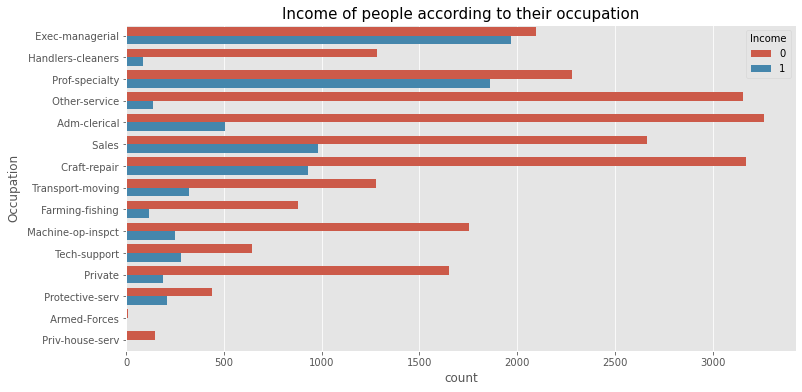

In [121]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.title("Income of people according to their occupation", fontsize = 15)
sns.countplot(y = df['Occupation'], hue = df['Income'])
plt.show()

Majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality

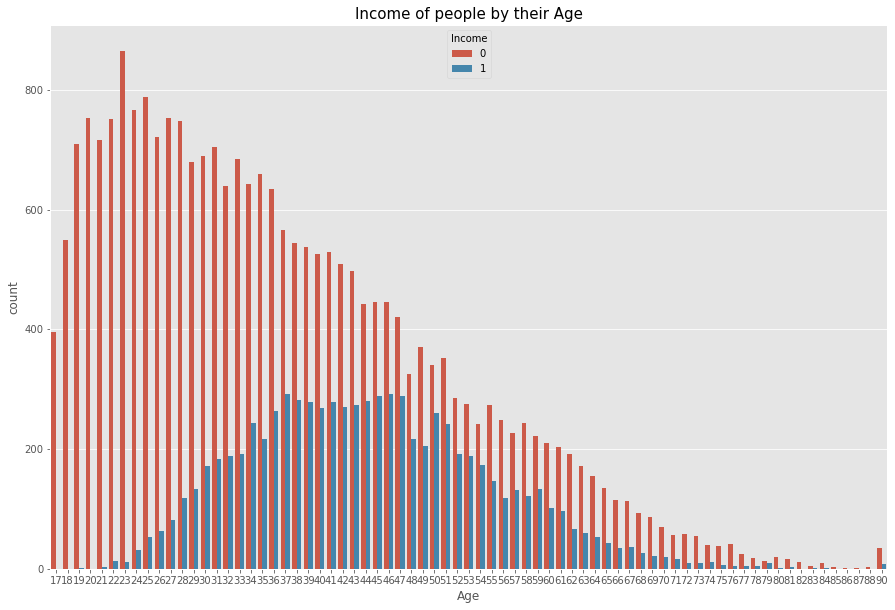

In [234]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.title("Income of people by their Age", fontsize = 15)
sns.countplot(x = df['Age'], hue = df['Income'])
plt.show()

Majority of People whose have income >50K belongs to age between 37 to 47.

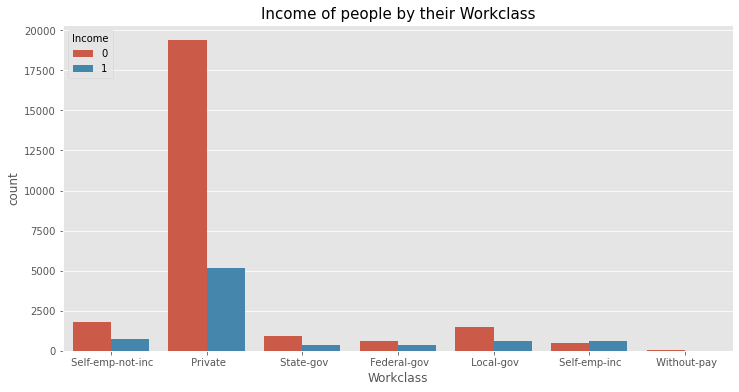

In [123]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.title("Income of people by their Workclass", fontsize = 15)
sns.countplot(x = df['Workclass'], hue = df['Income'])
plt.show()

The majority of people whose are from private sector have income >50K. 

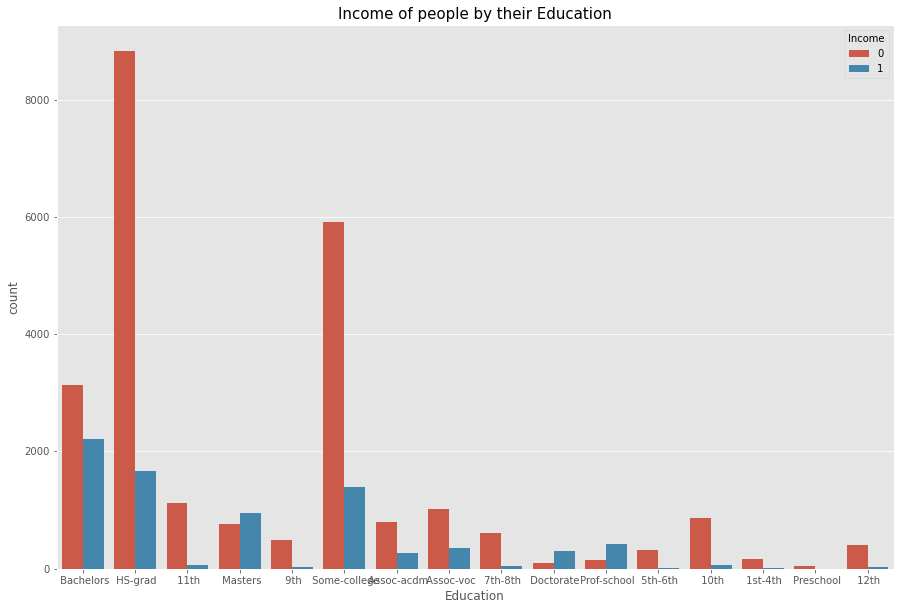

In [124]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.title("Income of people by their Education", fontsize = 15)
sns.countplot(x = df['Education'], hue = df['Income'])
plt.show()

People who have Bachelor Degree they have also income >50K as compare to others education.  

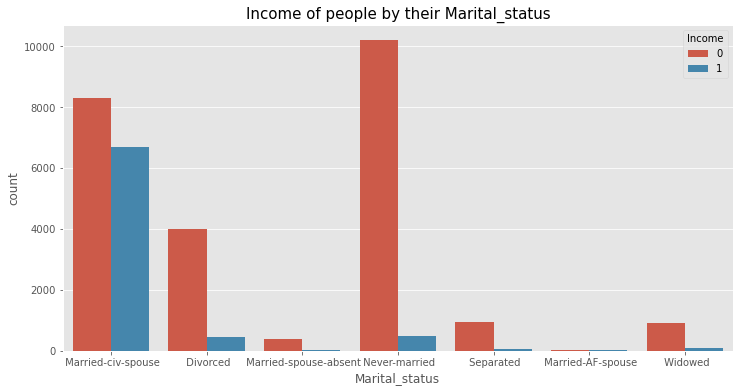

In [125]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.title("Income of people by their Marital_status", fontsize = 15)
sns.countplot(x = df['Marital_status'], hue = df['Income'])
plt.show()

Married people have higher income as compare to others.

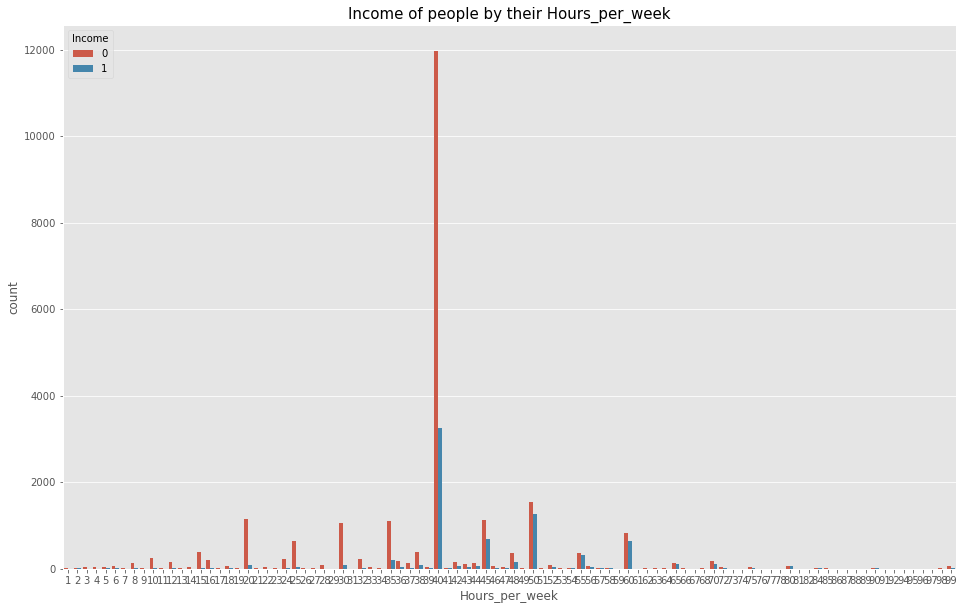

In [235]:
plt.style.use('ggplot')
plt.figure(figsize = (16,10))
plt.title("Income of people by their Hours_per_week", fontsize = 15)
sns.countplot(x = df['Hours_per_week'], hue = df['Income'])
plt.show()

People who have highest hours per week they have also high income as comapre to others.

# Multivariate Analysis

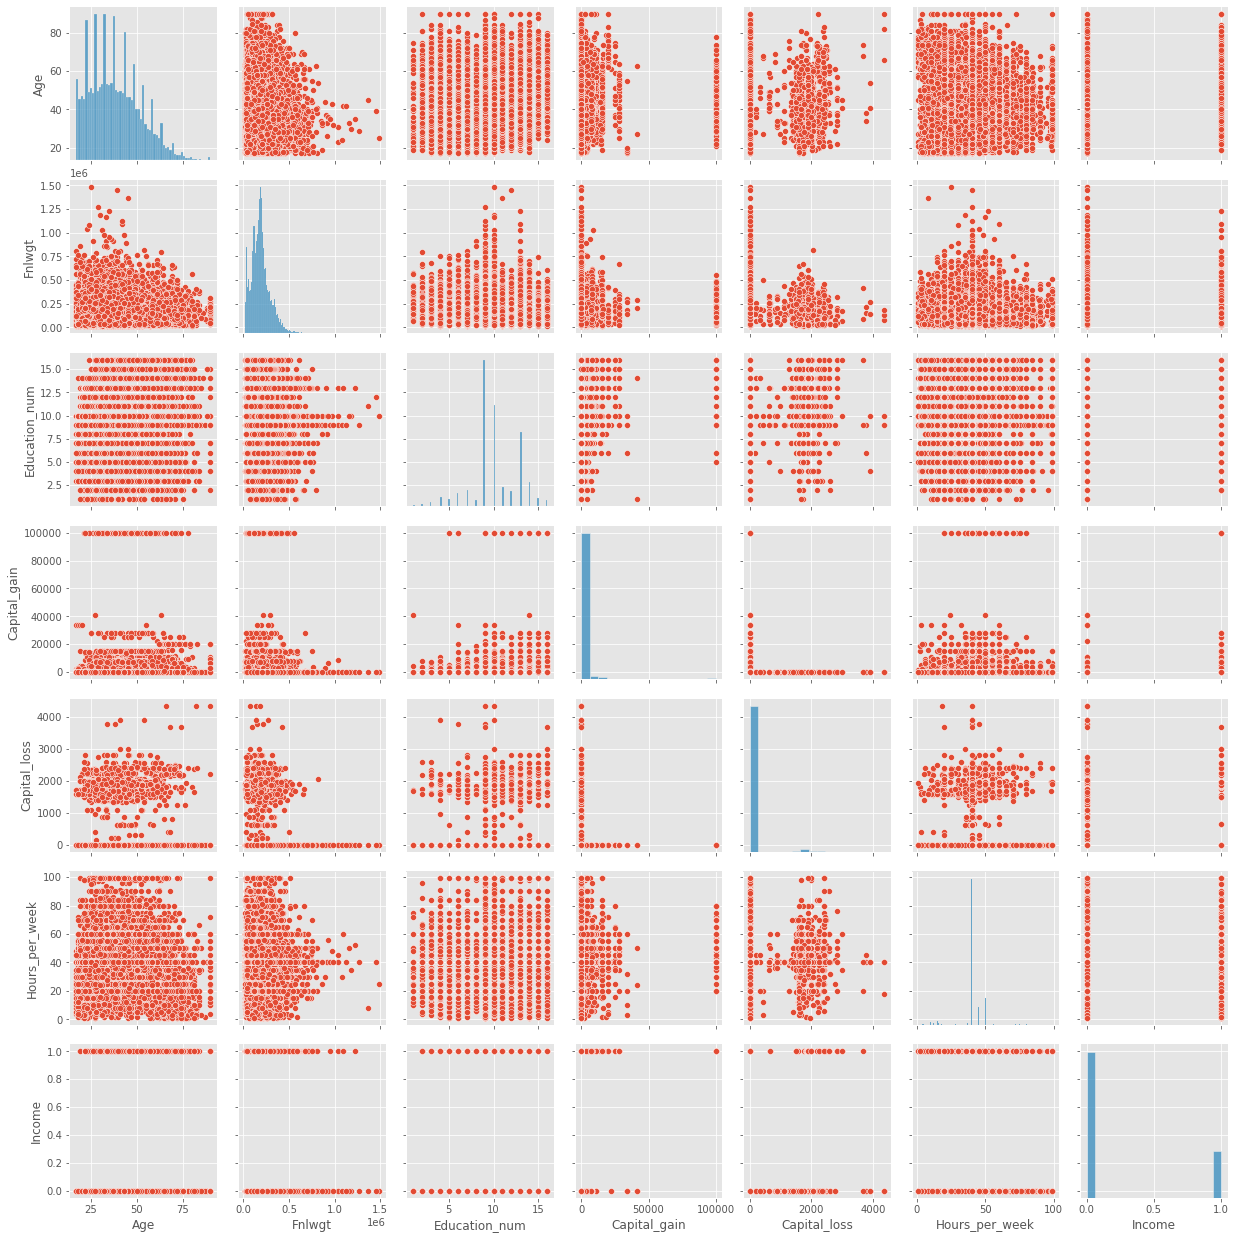

In [127]:
sns.pairplot(df)

With the help of pairplot ploting all featurs in one place.

# Data Encoding

In [130]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Workclass'] = labelencoder.fit_transform(df['Workclass'])
df['Marital_status'] = labelencoder.fit_transform(df['Marital_status'])
df['Occupation'] = labelencoder.fit_transform(df['Occupation'])
df['Relationship'] = labelencoder.fit_transform(df['Relationship'])
df['Race'] = labelencoder.fit_transform(df['Race'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Native_country'] = labelencoder.fit_transform(df['Native_country'])

In [131]:
df.drop(['Education'], axis = 1, inplace = True)

We see that for the feature 'Education', we already have the encoded values in feature 'Education_num'. 'Education' will be removed from the dataset.

In [132]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13,2,3,0,4,1,0,0,13,39,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,39,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,39,0
3,28,2,338409,13,2,10,5,2,0,0,0,40,4,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,39,0


# Data Cleaning

# Ploting Outliers.

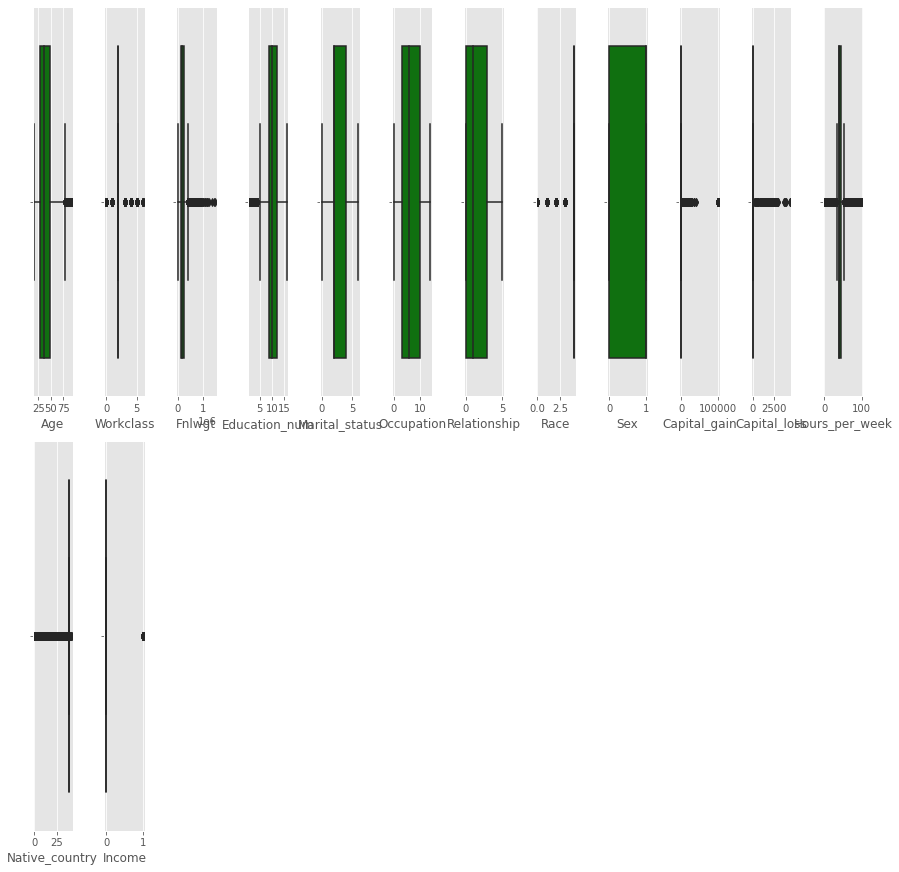

In [133]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

we are trying to identify, outliers are present in our data and as we are getting from above plot the outliers are present in our data.

# Applying Zscore to remove outliers and cleaning data.

In [134]:
from scipy.stats import zscore
zabs = np.abs(zscore(df.loc[:,'Fnlwgt':'Hours_per_week']))
print(np.shape(np.where(zabs >= 3)))
df_new = df[(zabs < 3).all(axis = 1)]
df_new

(2, 4041)


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13,2,3,0,4,1,0,0,13,39,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,39,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,39,0
3,28,2,338409,13,2,10,5,2,0,0,0,40,4,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,12,2,13,5,4,0,0,0,38,39,0
32556,40,2,154374,9,2,6,0,4,1,0,0,40,39,1
32557,58,2,151910,9,6,0,4,4,0,0,0,40,39,0
32558,22,2,201490,9,4,0,3,4,1,0,0,20,39,0


In [136]:
df_new.shape

(28686, 14)

# Spliting the Independent and Target Variables.

In [141]:
x=df_new.drop('Income',axis=1)
y=df_new['Income']

# Data Scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.452055,0.666667,0.132369,0.769231,0.333333,0.214286,0.0,1.0,1.0,0.00000,0.0,0.123288,0.950
1,0.287671,0.333333,0.404019,0.461538,0.000000,0.357143,0.2,1.0,1.0,0.00000,0.0,0.493151,0.950
2,0.493151,0.333333,0.443175,0.307692,0.333333,0.357143,0.0,0.0,1.0,0.00000,0.0,0.493151,0.950
3,0.150685,0.333333,0.656020,0.769231,0.333333,0.714286,1.0,0.0,0.0,0.00000,0.0,0.493151,0.075
4,0.273973,0.333333,0.545527,0.846154,0.333333,0.214286,1.0,1.0,0.0,0.00000,0.0,0.493151,0.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28681,0.136986,0.333333,0.489528,0.692308,0.333333,0.928571,1.0,1.0,0.0,0.00000,0.0,0.465753,0.950
28682,0.315068,0.333333,0.278243,0.461538,0.333333,0.428571,0.0,1.0,1.0,0.00000,0.0,0.493151,0.950
28683,0.561644,0.333333,0.273185,0.461538,1.000000,0.000000,0.8,1.0,0.0,0.00000,0.0,0.493151,0.950
28684,0.068493,0.333333,0.374960,0.461538,0.666667,0.000000,0.6,1.0,1.0,0.00000,0.0,0.219178,0.950


# Data Imbalance

Text(0.5, 1.0, 'Income')

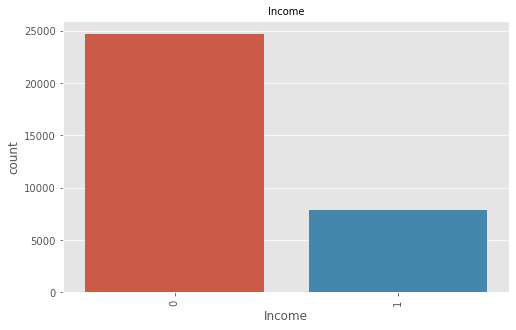

In [147]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Income")
plt.xticks(rotation=90)
plt.title("Income", fontsize = 10)

If the data is imbalanced, it can cause the overfitting and bias in the model prediction. So it is important to check and clear the data imbalance if present. We check the target variable to see if it is balanced or not.

In [148]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(dx,y)

As we are getting the data is imbalanced and knwo we are using SMOTE to balance the data.

In [150]:
y_over=pd.DataFrame(y_over)

In [157]:
X=x_over
y=y_over

In [159]:
print(X.shape,y.shape)

(44560, 13) (44560, 1)


shape of data after balancing.

# Finding best Random State for train test split.

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 49, 77.39377618192698


The Best Random State is 49, know we are spliting train or test according random state.

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=49)

# Importing Algorithms

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression

In [167]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.7739377618192699
[[5100 1481]
 [1541 5246]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6581
           1       0.78      0.77      0.78      6787

    accuracy                           0.77     13368
   macro avg       0.77      0.77      0.77     13368
weighted avg       0.77      0.77      0.77     13368



# Random Forest Classifier

In [169]:
rf=RandomForestClassifier(n_estimators=100,random_state=49)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9013315380011969
[[5867  714]
 [ 605 6182]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6581
           1       0.90      0.91      0.90      6787

    accuracy                           0.90     13368
   macro avg       0.90      0.90      0.90     13368
weighted avg       0.90      0.90      0.90     13368



# Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.858243566726511
[[5661  920]
 [ 975 5812]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6581
           1       0.86      0.86      0.86      6787

    accuracy                           0.86     13368
   macro avg       0.86      0.86      0.86     13368
weighted avg       0.86      0.86      0.86     13368



# AdaBoost Classifier

In [171]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8610861759425493
[[5536 1045]
 [ 812 5975]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6581
           1       0.85      0.88      0.87      6787

    accuracy                           0.86     13368
   macro avg       0.86      0.86      0.86     13368
weighted avg       0.86      0.86      0.86     13368



# MultinomialNB

In [174]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train) 
pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,pred_mnb))
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

0.7411729503291442
[[4333 2248]
 [1212 5575]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.71      6581
           1       0.71      0.82      0.76      6787

    accuracy                           0.74     13368
   macro avg       0.75      0.74      0.74     13368
weighted avg       0.75      0.74      0.74     13368



# KNeighbors Classifier

In [176]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8623578695391981
[[5181 1400]
 [ 440 6347]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6581
           1       0.82      0.94      0.87      6787

    accuracy                           0.86     13368
   macro avg       0.87      0.86      0.86     13368
weighted avg       0.87      0.86      0.86     13368



# Support Vector Classifier

In [175]:
svc=SVC()
svc.fit(X_train,y_train) 
pred_svc=svc.predict(X_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8252543387193297
[[5011 1570]
 [ 766 6021]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      6581
           1       0.79      0.89      0.84      6787

    accuracy                           0.83     13368
   macro avg       0.83      0.82      0.82     13368
weighted avg       0.83      0.83      0.82     13368



Best accuracy score is given by Random Forest Classifier model.

# Cross Validation

As we know the Random Forest Classifier is given hight score but we are Cross validating the models to see thre are underfitting or overfitting present or not.

In [177]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, X, y, cv = 5)
print(lg_scores)
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

rf_scores = cross_val_score(rf, X, y, cv = 5)
print(rf_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rf_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, X, y, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

ad_scores = cross_val_score(ad, X, y, cv = 5)
print(ad_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ad_scores.mean()*100}\n")

mnb_scores = cross_val_score(mnb, X, y, cv = 5)
print(mnb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {mnb_scores.mean()*100}\n")

knn_scores = cross_val_score(knn, X, y, cv = 5)
print(knn_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knn_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, X, y, cv = 5)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

[0.75998654 0.76929982 0.76335278 0.76929982 0.76436266]
Mean of accuracy scores is for Logistic Regression is 76.52603231597845

[0.83090215 0.88767953 0.92650359 0.93368492 0.92852334]
Mean of accuracy scores is for Random Forest Classifier is 90.14587073608618

[0.76110862 0.84863106 0.88981149 0.88891382 0.89216786]
Mean of accuracy scores is for Decision Tree Classifier is 85.61265709156194

[0.81227558 0.84773339 0.86074955 0.87129713 0.86254488]
Mean of accuracy scores is for ADA Boost Classifier is 85.09201077199282

[0.7391158  0.74023788 0.7364228  0.73934022 0.74091113]
Mean of accuracy scores is for MultinomialNB is 73.9205565529623

[0.85255835 0.85570018 0.87253142 0.87387792 0.8736535 ]
Mean of accuracy scores is for KNN Classifier is 86.56642728904848

[0.82035458 0.81732496 0.82372083 0.82158887 0.82540395]
Mean of accuracy scores is for SVC Classifier is 82.16786355475762



After applying cross validation on all algorithms know we have Mean accuracy score without overffiting or underffiting.

# Hyper parameter tuning

In [178]:
from sklearn.model_selection import GridSearchCV

In [180]:
rf = RandomForestClassifier()
grid_parameters = dict()
grid_parameters['criterion'] = ['gini', 'entropy']
grid_parameters['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
grid_parameters['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_parameters)
print(best_result)
print(best_model)

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 100}
0.8936265281207204
RandomForestClassifier(criterion='entropy', min_samples_split=5)


After the hyperparameter tuning, the best parameters for Random Forest Classifier are 'crietrion' = 'entropy', 'min_samples_split' = 5, 'n_estimators' = 100. Know we are building the model with these parameters.

In [193]:
rf = RandomForestClassifier(criterion = 'entropy', min_samples_split = 5, n_estimators = 100)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
pred_rf = rf.predict(X_test)

0.9893562451910747


The score is highest with the best parameters.

# Model Evaluation

# Metrics

In [184]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [185]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [194]:
y_pred_prob=rf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.        , 0.60316667, 0.97666667, ..., 0.9115    , 0.975     ,
       0.985     ])

In [195]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [196]:
fpr

array([0.        , 0.        , 0.        , ..., 0.76401763, 0.76416958,
       1.        ])

In [197]:
tpr

array([0.        , 0.10240165, 0.10299101, ..., 0.99970532, 0.99970532,
       1.        ])

In [198]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98888889e-01, ...,
       1.11111111e-03, 9.09090909e-04, 0.00000000e+00])

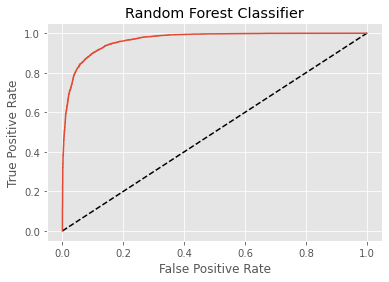

In [199]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [201]:
auc_score=roc_auc_score(y_test,rf.predict(X_test))
print(auc_score)

0.8992577719317213


AUC_ROC_Score  is 89% which is very good score.

In [202]:
from sklearn import metrics

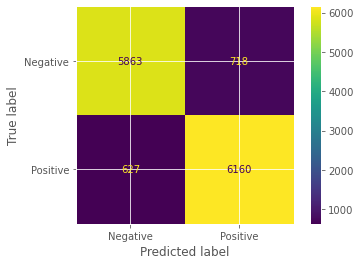

In [203]:
metrics.plot_confusion_matrix(rf, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving Model

In [204]:
import joblib
joblib.dump(rf,'Census_Income.obj')

['Census_Income.obj']